# diffloop testing
- testing = GDSD0/3/6/ testing

In [16]:
library(ggplot2)
library(GenomicRanges)
library(ggrepel)
library(tidyverse)
library(foreach)
# library(DESeq2)#, lib.loc='/home/users/mguo123/R/x86_64-pc-linux-gnu-library/3.5')
# library(diffloop)#, lib.loc='/home/users/mguo123/R/x86_64-pc-linux-gnu-library/3.5')
# library(diffloopdata)#, lib.loc='/home/users/mguo123/R/x86_64-pc-linux-gnu-library/3.5')
library(limma)#, lib.loc='/home/users/mguo123/R/x86_64-pc-linux-gnu-library/3.5')
library(edgeR)#, lib.loc='/home/users/mguo123/R/x86_64-pc-linux-gnu-library/3.5')
library(corrplot)
library(pheatmap)

corrplot 0.89 loaded



In [15]:
# installed.packages()
install.packages('corrplot')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
# .libPaths()
getwd()

In [ ]:
# Grab all transition start sites genome-wide
human.TSS <- getHumanTSS()
# human.TSS

In [ ]:
promoter <- padGRanges(getHumanTSS(), pad = 2500)
head(promoter)
# write.csv(data.frame(promoter), file='../annon/promoter_pad2500.csv')#file='../omi promoter_pad2500.csv')

In [ ]:
# write.csv(data.frame(human.TSS), file='human_tss.csv')

In [ ]:
bd<- system.file('extdata', 'esc_jurkat', package='diffloopdata')
bd

In [ ]:
# loops <- loopsMake(bd) #standard call
# loops

In [ ]:
# dim(loops)

In [ ]:
# # tail -n +2 test.bed | cut -f 1-6 | sed 's/\t/ /g' > test.loop_counts.bedpe
# # tail -n +2 test2.bed | cut -f 1-6 | sed 's/\t/ /g' > test2.loop_counts.bedpe

# tail -n +2 test.bed | awk '$7=("loop_"FNR FS $7)' | sed 's/\t/ /g' > test.loop_counts.bedpe
# tail -n +2 test2.bed | awk '$7=("loop_"FNR FS $7)' | sed 's/\t/ /g' > test2.loop_counts.bedpe


# # tail -n +2 test.bed | awk '$7=("loop_"FNR FS $7)' | cut -f 1-8 | sed 's/\t/ /g' > test.loop_counts.bedpe
# # tail -n +2 test2.bed | awk '$7=("loop_"FNR FS $7)' | cut -f 1-8 | sed 's/\t/ /g' > test2.loop_counts.bedpe


# GDS testing

In [58]:
# dlo = loopsMake('/oak/stanford/groups/khavari/users/mguo123/diffloop_hichip/test_files',
#           c('test','test2'))
samples = c('GDSD0_B1','GDSD0_B2', 'GDSD3_B1','GDSD3_B2','GDSD6_B1','GDSD6_B2')
dlo = loopsMake('testing',
               samples)

Warning message:
“Unnamed `col_types` should have the same length as `col_names`. Using smaller of the two.”Warning message:
“132202 parsing failures.
row col  expected     actual                                 file
  1  -- 8 columns 26 columns 'testing/GDSD0_B1.loop_counts.bedpe'
  2  -- 8 columns 26 columns 'testing/GDSD0_B1.loop_counts.bedpe'
  3  -- 8 columns 26 columns 'testing/GDSD0_B1.loop_counts.bedpe'
  4  -- 8 columns 26 columns 'testing/GDSD0_B1.loop_counts.bedpe'
  5  -- 8 columns 26 columns 'testing/GDSD0_B1.loop_counts.bedpe'
... ... ......... .......... ....................................
See problems(...) for more details.
”Warning message:
“Unnamed `col_types` should have the same length as `col_names`. Using smaller of the two.”Warning message:
“96253 parsing failures.
row col  expected     actual                                 file
  1  -- 8 columns 26 columns 'testing/GDSD0_B2.loop_counts.bedpe'
  2  -- 8 columns 26 columns 'testing/GDSD0_B2.loop_counts.bedpe'
  

In [67]:
# ###DEBUGGING TO THIS LINE FOUND LINE WITH HEADER 
# ####USED SED TO REMOVE WHEN CREATING BEDPE file
# anchors<-makeGRangesFromDataFrame(do.call(rbind, 
#         anchorsraw), ignore.strand = TRUE, seqnames.field = "X1", 
#         start.field = "X2", end.field = "X3")

In [68]:
# nlibs <- 4
# ngenes <- 1000
# dispersion.true <- 1/rchisq(ngenes, df=10)
# design <- model.matrix(~factor(c(1,1,2,2)))
# y <- rnbinom(ngenes*nlibs,mu=20,size=1/dispersion.true)
# y <- matrix(y,ngenes,nlibs)
# d <- DGEList(y)
# d <- calcNormFactors(d)
# d
# estimateDisp(d, design)


In [ ]:
dlo

In [50]:
dim(dlo)

ERROR: Error in eval(expr, envir, enclos): object 'dlo' not found


In [79]:
groups = c('GDSD0','GDSD0', 'GDSD3','GDSD3','GDSD6','GDSD6')

dlo@colData$groups =groups#= c('test','test2')
# groups <- dlo@colData$groups

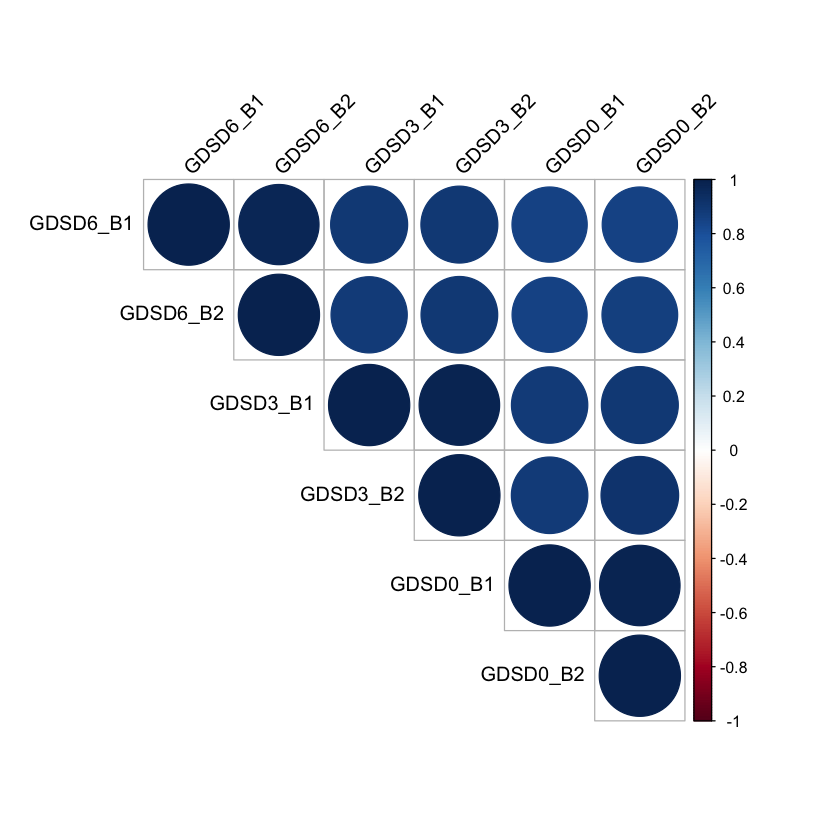

In [108]:
res = cor(dlo@counts)
corrplot(res, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

Saving 7 x 7 in image


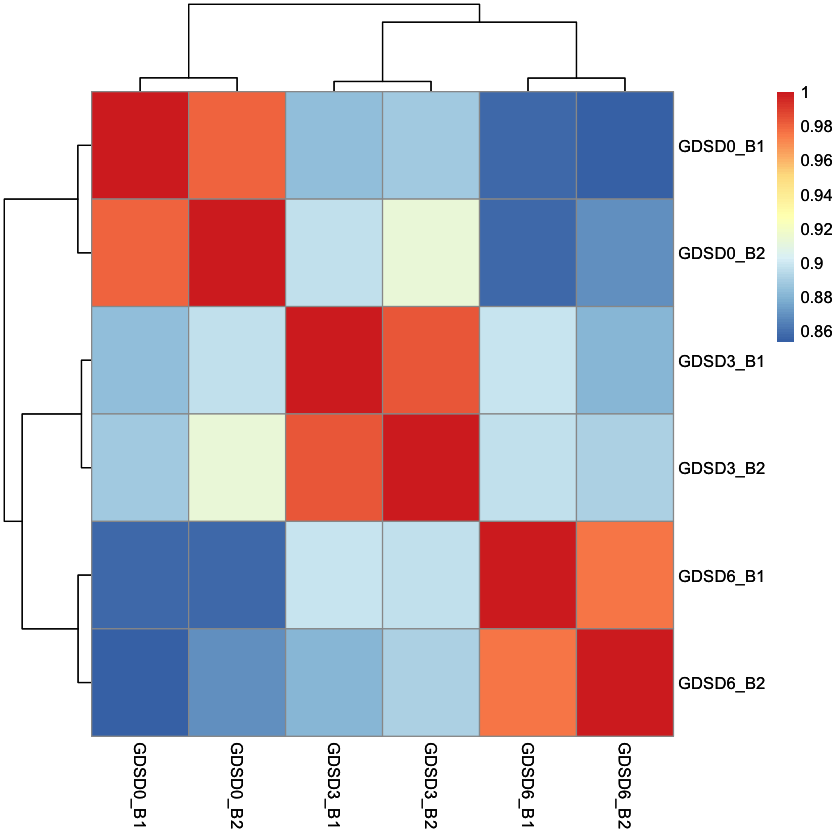

In [119]:
p = pheatmap(res)
# p
# ggsave('gds_corr.png') # doesn't work should manual save

In [72]:
# design = model.matrix(~groups)
# estimateGLMCommonDisp(z, design)


In [73]:
# cat("The coefficients of the fitted GLM object are:\n")
# cat(colnames(model.matrix(~groups)))
# yy <- estimateGLMCommonDisp(z, design)
# fit <- glmQLFit(yy, design, robust = TRUE,dispersion=0.05)

Saving 7 x 7 in image


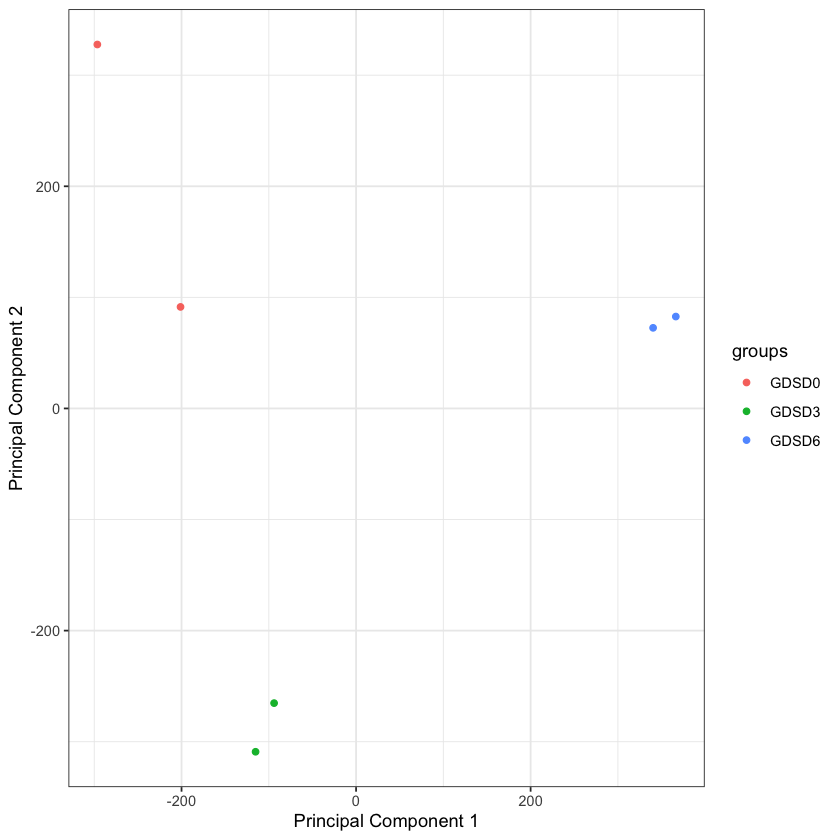

In [120]:
p = pcaPlot(dlo)
p
ggsave('gds_pca.png')

In [95]:
# association btn all groups
assoc <-loopAssoc(dlo,coef=2)

In [116]:
# Gene based association
sw_jn <- featureTest(assoc, getHumanGenes())
gds_all_comp = sw_jn%>%
    arrange(PValue)

write.csv(gds_all_comp, file='gds_all_comp.csv')

In [180]:
# testing difference from gdsd0 from others
dlo@colData$groups = 'control'
dlo@colData$groups[1:2]  = 'test'
groups = dlo@colData$groups
dlo@colData

,sizeFactor,groups
,<dbl>,<chr>
GDSD0_B1,1.2076329,test
GDSD0_B2,0.8805916,test
GDSD3_B1,1.2399822,control
GDSD3_B2,1.0820323,control
GDSD6_B1,0.8732469,control
GDSD6_B2,0.9381342,control


In [181]:
assoc <-loopAssoc(dlo,coef=2)
sw_jn <- featureTest(assoc, getHumanGenes())
gds_comp = sw_jn%>%
    arrange(PValue)
head(gds_comp,100)
write.csv(gds_comp, file='gds_comp_GDSD0.csv')

The coefficients of the fitted GLM object are:
(Intercept) groupstest

chr,start,stop,n,feature,FDR,PValue
<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
2,203070903,203103331,2,SUMO1,0.20266,0.001892929
15,90152020,90198682,1,KIF7,0.20266,0.002640044
19,40575059,40596845,1,ZNF780A,0.20266,0.003123920
2,198318147,198340032,2,COQ10B,0.20266,0.003564492
11,66036004,66044963,1,RAB1B,0.20266,0.003591820
2,203130439,203168389,4,NOP58,0.20266,0.003785858
18,71815746,71826197,1,TIMM21,0.20266,0.004132198
14,105864916,105916443,2,TEX22,0.20266,0.004458539
12,49047184,49076021,2,KANSL2,0.20266,0.004621312


In [182]:
# testing difference from gdsd3 from others
dlo@colData$groups = 'control'
dlo@colData$groups[3:4]  = 'test'
groups = dlo@colData$groups
dlo@colData

,sizeFactor,groups
,<dbl>,<chr>
GDSD0_B1,1.2076329,control
GDSD0_B2,0.8805916,control
GDSD3_B1,1.2399822,test
GDSD3_B2,1.0820323,test
GDSD6_B1,0.8732469,control
GDSD6_B2,0.9381342,control


In [183]:
assoc <-loopAssoc(dlo,coef=2)
sw_jn <- featureTest(assoc, getHumanGenes())
gds_comp = sw_jn%>%
    arrange(PValue)
head(gds_comp,100)
write.csv(gds_comp, file='gds_comp_GDSD3.csv')

The coefficients of the fitted GLM object are:
(Intercept) groupstest

chr,start,stop,n,feature,FDR,PValue
<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
10,99079022,99081672,1,FRAT1,0.2288977,0.001579137
10,126490354,126525239,2,FAM175B,0.2288977,0.002518547
22,18900294,18924066,3,PRODH,0.2288977,0.003560804
16,2028918,2034193,1,NOXO1,0.2288977,0.003805846
16,2034208,2037750,1,GFER,0.2288977,0.003805846
8,41434706,41482520,2,AGPAT6,0.2288977,0.004028677
1,244515937,244552965,10,C1orf100,0.2288977,0.004153016
12,112079950,112123790,1,BRAP,0.2288977,0.004375923
22,50639408,50656045,1,SELO,0.2288977,0.004380204


In [184]:
# testing difference from gdsd6 from others
dlo@colData$groups = 'control'
dlo@colData$groups[5:6]  = 'test'
groups = dlo@colData$groups
dlo@colData

,sizeFactor,groups
,<dbl>,<chr>
GDSD0_B1,1.2076329,control
GDSD0_B2,0.8805916,control
GDSD3_B1,1.2399822,control
GDSD3_B2,1.0820323,control
GDSD6_B1,0.8732469,test
GDSD6_B2,0.9381342,test


In [185]:
assoc <-loopAssoc(dlo,coef=2)
sw_jn <- featureTest(assoc, getHumanGenes())
gds_comp = sw_jn%>%
    arrange(PValue)
head(gds_comp,100)
write.csv(gds_comp, file='gds_comp_GDSD6.csv')

The coefficients of the fitted GLM object are:
(Intercept) groupstest

chr,start,stop,n,feature,FDR,PValue
<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
3,196281056,196295545,1,WDR53,0.224424,0.0004550820
3,196295482,196315930,1,FBXO45,0.224424,0.0004550820
10,81107225,81115093,3,PPIF,0.224424,0.0005937068
22,35695268,35743985,1,TOM1,0.224424,0.0006451521
8,7300206,7321196,1,SPAG11B,0.224424,0.0015052205
8,7705398,7726389,1,SPAG11A,0.224424,0.0015052205
6,36283534,36304662,4,C6orf222,0.224424,0.0016524330
9,35736863,35749983,6,GBA2,0.224424,0.0018301108
8,38758753,38831428,8,PLEKHA2,0.224424,0.0018425177


In [196]:
# add known chip-seq peaks
#  system.file('extdata','Jurkat_H3K27ac_chr1.narrowPeak',package='diffloop')

enhancer_d0 = 'GGR_H3K27ac_ChIP_data/GGR_H3K27ac_union_bpk.D0_counts.bed'
enhancer_d0 =  rmchr(padGRanges(bedToGRanges(enhancer_d0), pad = 1000))


promoter <- padGRanges(getHumanTSS(), pad = 1000)
dlo_d0 = loopsMake('testing',
               c('GDSD0_B1','GDSD0_B2'))
dlo_d0.ep <- keepEPloops(dlo_d0, enhancer_d0, promoter)

dim(dlo_d0)
dim(dlo_d0.ep)


Warning message:
“Unnamed `col_types` should have the same length as `col_names`. Using smaller of the two.”Warning message:
“132202 parsing failures.
row col  expected     actual                                 file
  1  -- 8 columns 26 columns 'testing/GDSD0_B1.loop_counts.bedpe'
  2  -- 8 columns 26 columns 'testing/GDSD0_B1.loop_counts.bedpe'
  3  -- 8 columns 26 columns 'testing/GDSD0_B1.loop_counts.bedpe'
  4  -- 8 columns 26 columns 'testing/GDSD0_B1.loop_counts.bedpe'
  5  -- 8 columns 26 columns 'testing/GDSD0_B1.loop_counts.bedpe'
... ... ......... .......... ....................................
See problems(...) for more details.
”Warning message:
“Unnamed `col_types` should have the same length as `col_names`. Using smaller of the two.”Warning message:
“96253 parsing failures.
row col  expected     actual                                 file
  1  -- 8 columns 26 columns 'testing/GDSD0_B2.loop_counts.bedpe'
  2  -- 8 columns 26 columns 'testing/GDSD0_B2.loop_counts.bedpe'
  

anchors,interactions,samples,colData,rowData
<int>,<int>,<int>,<int>,<int>
41713,52722,2,2,1


anchors,interactions,samples,colData,rowData
<int>,<int>,<int>,<int>,<int>
16513,18914,2,2,4


In [210]:
print(18914/52722)

[1] 0.3587497


In [197]:
#d3
enhancer_d3 = 'GGR_H3K27ac_ChIP_data/GGR_H3K27ac_union_bpk.D3_counts.bed'
enhancer_d3 =  rmchr(padGRanges(bedToGRanges(enhancer_d3), pad = 1000))


promoter <- padGRanges(getHumanTSS(), pad = 1000)
dlo_d3 = loopsMake('testing',
               c('GDSD3_B1','GDSD3_B2'))
dlo_d3.ep <- keepEPloops(dlo_d3, enhancer_d3, promoter)

dim(dlo_d3)
dim(dlo_d3.ep)


Warning message:
“Unnamed `col_types` should have the same length as `col_names`. Using smaller of the two.”Warning message:
“135070 parsing failures.
row col  expected     actual                                 file
  1  -- 8 columns 26 columns 'testing/GDSD3_B1.loop_counts.bedpe'
  2  -- 8 columns 26 columns 'testing/GDSD3_B1.loop_counts.bedpe'
  3  -- 8 columns 26 columns 'testing/GDSD3_B1.loop_counts.bedpe'
  4  -- 8 columns 26 columns 'testing/GDSD3_B1.loop_counts.bedpe'
  5  -- 8 columns 26 columns 'testing/GDSD3_B1.loop_counts.bedpe'
... ... ......... .......... ....................................
See problems(...) for more details.
”Warning message:
“Unnamed `col_types` should have the same length as `col_names`. Using smaller of the two.”Warning message:
“120811 parsing failures.
row col  expected     actual                                 file
  1  -- 8 columns 26 columns 'testing/GDSD3_B2.loop_counts.bedpe'
  2  -- 8 columns 26 columns 'testing/GDSD3_B2.loop_counts.bedpe'
 

anchors,interactions,samples,colData,rowData
<int>,<int>,<int>,<int>,<int>
41314,51128,2,2,1


anchors,interactions,samples,colData,rowData
<int>,<int>,<int>,<int>,<int>
15980,17913,2,2,4


In [212]:
17913/51128

[1] 0.350356

In [198]:
#d3
enhancer_d6 = 'GGR_H3K27ac_ChIP_data/GGR_H3K27ac_union_bpk.D6_counts.bed'
enhancer_d6 =  rmchr(padGRanges(bedToGRanges(enhancer_d6), pad = 1000))


promoter <- padGRanges(getHumanTSS(), pad = 1000)
dlo_d6 = loopsMake('testing',
               c('GDSD6_B1','GDSD6_B2'))
dlo_d6.ep <- keepEPloops(dlo_d6, enhancer_d6, promoter)

dim(dlo_d6)
dim(dlo_d6.ep)


Warning message:
“Unnamed `col_types` should have the same length as `col_names`. Using smaller of the two.”Warning message:
“114011 parsing failures.
row col  expected     actual                                 file
  1  -- 8 columns 26 columns 'testing/GDSD6_B1.loop_counts.bedpe'
  2  -- 8 columns 26 columns 'testing/GDSD6_B1.loop_counts.bedpe'
  3  -- 8 columns 26 columns 'testing/GDSD6_B1.loop_counts.bedpe'
  4  -- 8 columns 26 columns 'testing/GDSD6_B1.loop_counts.bedpe'
  5  -- 8 columns 26 columns 'testing/GDSD6_B1.loop_counts.bedpe'
... ... ......... .......... ....................................
See problems(...) for more details.
”Warning message:
“Unnamed `col_types` should have the same length as `col_names`. Using smaller of the two.”Warning message:
“117514 parsing failures.
row col  expected     actual                                 file
  1  -- 8 columns 26 columns 'testing/GDSD6_B2.loop_counts.bedpe'
  2  -- 8 columns 26 columns 'testing/GDSD6_B2.loop_counts.bedpe'
 

anchors,interactions,samples,colData,rowData
<int>,<int>,<int>,<int>,<int>
37163,48249,2,2,1


anchors,interactions,samples,colData,rowData
<int>,<int>,<int>,<int>,<int>
14736,16965,2,2,4


In [211]:
16965/48249

[1] 0.3516135

In [201]:
# ALL
enhancer_dALL = 'GGR_H3K27ac_ChIP_data/GGR_H3K27ac_union_bpk.ALL_counts.bed'
enhancer_dALL =  rmchr(padGRanges(bedToGRanges(enhancer_dALL), pad = 1000))


promoter <- padGRanges(getHumanTSS(), pad = 1000)

dlo.ep <- keepEPloops(dlo, enhancer_dALL, promoter)

dim(dlo)
dim(dlo.ep)


anchors,interactions,samples,colData,rowData
<int>,<int>,<int>,<int>,<int>
51509,73819,6,2,1


anchors,interactions,samples,colData,rowData
<int>,<int>,<int>,<int>,<int>
19366,25922,6,2,4


In [215]:
19366/51509

[1] 0.3759731

In [213]:
25922/73819

[1] 0.3511562

In [203]:
# run pairwise comparisons on ep filtered loops
groups = c('GDSD0','GDSD0', 'GDSD3','GDSD3','GDSD6','GDSD6')

dlo.ep@colData$groups =groups
assoc <-loopAssoc(dlo.ep,coef=2)
sw_jn <- featureTest(assoc, getHumanGenes())
gds_comp = sw_jn%>%
    arrange(PValue)
head(gds_comp,100)
write.csv(gds_comp, file='gds_ep_comp_ALL.csv')

The coefficients of the fitted GLM object are:
(Intercept) groupsGDSD3 groupsGDSD6

chr,start,stop,n,feature,FDR,PValue
<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
22,19023795,19109967,1,DGCR2,0.3937128,0.01569047
22,36585172,36600886,1,APOL4,0.3937128,0.01641895
7,128577666,128590089,1,IRF5,0.3937128,0.01707758
10,126490354,126525239,1,FAM175B,0.3937128,0.01884201
12,14765576,14849519,1,GUCY2C,0.3937128,0.02025593
10,99079022,99081672,1,FRAT1,0.3937128,0.02124014
15,89998680,90039844,3,RHCG,0.3937128,0.02562202
15,66585555,66626236,1,DIS3L,0.3937128,0.02675326
12,103981051,104160505,1,STAB2,0.3937128,0.02732755


In [204]:
# testing difference from gdsd0 from others
dlo.ep@colData$groups = 'control'
dlo.ep@colData$groups[1:2]  = 'test'
groups = dlo.ep@colData$groups
dlo.ep@colData

,sizeFactor,groups
,<dbl>,<chr>
GDSD0_B1,1.2076329,test
GDSD0_B2,0.8805916,test
GDSD3_B1,1.2399822,control
GDSD3_B2,1.0820323,control
GDSD6_B1,0.8732469,control
GDSD6_B2,0.9381342,control


In [205]:
assoc <-loopAssoc(dlo.ep,coef=2)
sw_jn <- featureTest(assoc, getHumanGenes())
gds_comp = sw_jn%>%
    arrange(PValue)
head(gds_comp,100)
write.csv(gds_comp, file='gds_ep_comp_GDSD0.csv')

The coefficients of the fitted GLM object are:
(Intercept) groupstest

chr,start,stop,n,feature,FDR,PValue
<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
2,203070903,203103331,2,SUMO1,0.206667,0.001921284
12,103981051,104160505,1,STAB2,0.206667,0.002602289
X,135229559,135293518,2,FHL1,0.206667,0.002624368
19,40575059,40596845,1,ZNF780A,0.206667,0.003109978
8,56014949,56454613,2,XKR4,0.206667,0.003208432
1,156374042,156400493,1,C1orf61,0.206667,0.003234767
15,40226347,40327797,3,EIF2AK4,0.206667,0.003391847
11,73111532,73309234,2,FAM168A,0.206667,0.003448892
2,198318147,198340032,2,COQ10B,0.206667,0.003566980


In [206]:
# testing difference from gdsd3 from others
dlo.ep@colData$groups = 'control'
dlo.ep@colData$groups[3:4]  = 'test'
groups = dlo.ep@colData$groups
dlo.ep@colData

,sizeFactor,groups
,<dbl>,<chr>
GDSD0_B1,1.2076329,control
GDSD0_B2,0.8805916,control
GDSD3_B1,1.2399822,test
GDSD3_B2,1.0820323,test
GDSD6_B1,0.8732469,control
GDSD6_B2,0.9381342,control


In [207]:
assoc <-loopAssoc(dlo.ep,coef=2)
sw_jn <- featureTest(assoc, getHumanGenes())
gds_comp = sw_jn%>%
    arrange(PValue)
head(gds_comp,100)
write.csv(gds_comp, file='gds_ep_comp_GDSD3.csv')

The coefficients of the fitted GLM object are:
(Intercept) groupstest

chr,start,stop,n,feature,FDR,PValue
<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
10,126490354,126525239,1,FAM175B,0.279733,0.001252883
10,99079022,99081672,1,FRAT1,0.279733,0.001571168
22,18900294,18924066,2,PRODH,0.279733,0.002361894
13,78109809,78219398,2,SCEL,0.279733,0.002827592
X,149934810,150067289,1,CD99L2,0.279733,0.002836944
16,2028918,2034193,1,NOXO1,0.279733,0.003786534
16,2034208,2037750,1,GFER,0.279733,0.003786534
X,54775332,54824673,1,ITIH6,0.279733,0.003847385
9,82186688,82341658,2,TLE4,0.279733,0.003969237


In [208]:
# testing difference from gdsd6 from others
dlo.ep@colData$groups = 'control'
dlo.ep@colData$groups[5:6]  = 'test'
groups = dlo.ep@colData$groups
dlo.ep@colData

,sizeFactor,groups
,<dbl>,<chr>
GDSD0_B1,1.2076329,control
GDSD0_B2,0.8805916,control
GDSD3_B1,1.2399822,control
GDSD3_B2,1.0820323,control
GDSD6_B1,0.8732469,test
GDSD6_B2,0.9381342,test


In [209]:
assoc <-loopAssoc(dlo.ep,coef=2)
sw_jn <- featureTest(assoc, getHumanGenes())
gds_comp = sw_jn%>%
    arrange(PValue)
head(gds_comp,100)
write.csv(gds_comp, file='gds_ep_comp_GDSD6.csv')

The coefficients of the fitted GLM object are:
(Intercept) groupstest

chr,start,stop,n,feature,FDR,PValue
<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
3,196281056,196295545,1,WDR53,0.2192416,0.0004550835
3,196295482,196315930,1,FBXO45,0.2192416,0.0004550835
10,81107225,81115093,3,PPIF,0.2192416,0.0005972576
11,46740730,46761056,1,F2,0.2192416,0.0011775027
11,46764598,46867847,1,CKAP5,0.2192416,0.0011775027
10,80828792,81076276,6,ZMIZ1,0.2192416,0.0011945151
15,68346517,68483096,8,PIAS1,0.2192416,0.0013070621
6,36283534,36304662,3,C6orf222,0.2192416,0.0014494767
10,72432559,72522197,5,ADAMTS14,0.2192416,0.0016007850


# p2p_merged

In [21]:
dlo_p2p = loopsMake('fithichip_p2p_p2p1')

Warning message:
“Unnamed `col_types` should have the same length as `col_names`. Using smaller of the two.”Warning message:
“12199 parsing failures.
row col  expected     actual                                          file
  1  -- 8 columns 16 columns 'fithichip_p2p_p2p1/Air_B1.loop_counts.bedpe'
  2  -- 8 columns 16 columns 'fithichip_p2p_p2p1/Air_B1.loop_counts.bedpe'
  3  -- 8 columns 16 columns 'fithichip_p2p_p2p1/Air_B1.loop_counts.bedpe'
  4  -- 8 columns 16 columns 'fithichip_p2p_p2p1/Air_B1.loop_counts.bedpe'
  5  -- 8 columns 16 columns 'fithichip_p2p_p2p1/Air_B1.loop_counts.bedpe'
... ... ......... .......... .............................................
See problems(...) for more details.
”Warning message:
“Unnamed `col_types` should have the same length as `col_names`. Using smaller of the two.”Warning message:
“16994 parsing failures.
row col  expected     actual                                            file
  1  -- 8 columns 16 columns 'fithichip_p2p_p2p1/Astro_B1.loo

In [25]:
dim(dlo_p2p)



anchors,interactions,samples,colData,rowData
<int>,<int>,<int>,<int>,<int>
77634,181495,33,2,1


In [25]:
head(dlo_p2p@counts)

Air_B1,Astro_B1,Astro_B2,Blad_B1,Blad_B2,Colon_B1,Colon_B2,Eso_B1,Eso_B2,GDSD0_B1,⋯,Panc_B1,Panc_B2,Pros_B1,Pros_B2,Renal_B1,Renal_B2,Thy_B1,Thy_B2,Uter_B1,Uter_B2
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,11
0,0,48,12,14,0,22,16,25,0,⋯,0,0,22,56,27,28,51,49,0,73
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,16
0,0,0,0,0,0,11,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,39
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [26]:
res = cor(dlo_p2p@counts,method='pearson')


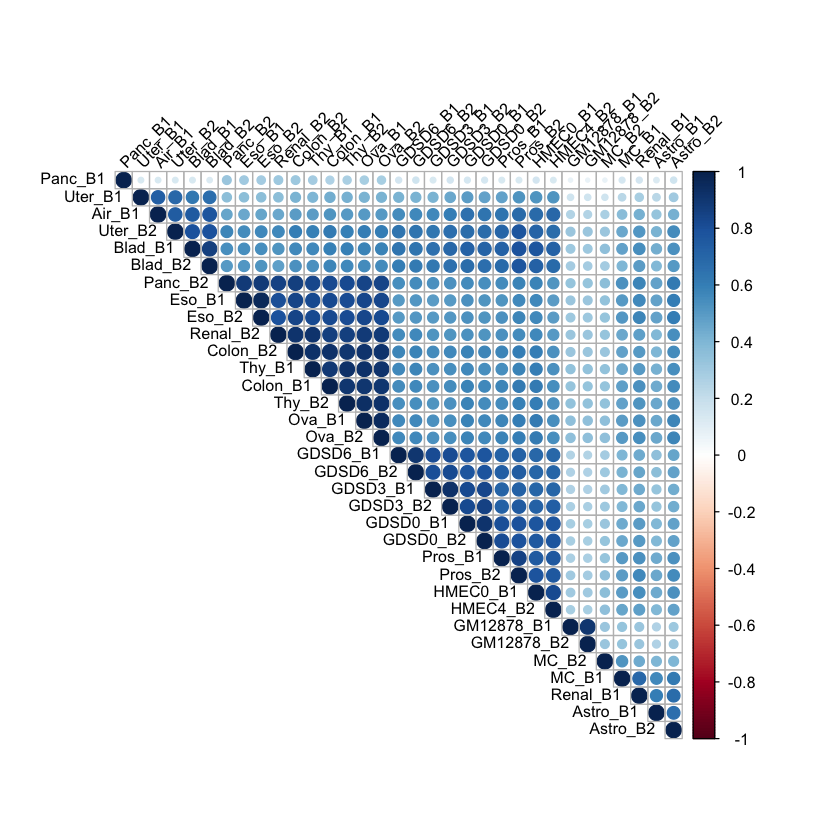

In [27]:
p = corrplot(res, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45,
             tl.pos='td',tl.cex=.8)
# p
# ggsave('p2p_corrplot.png')

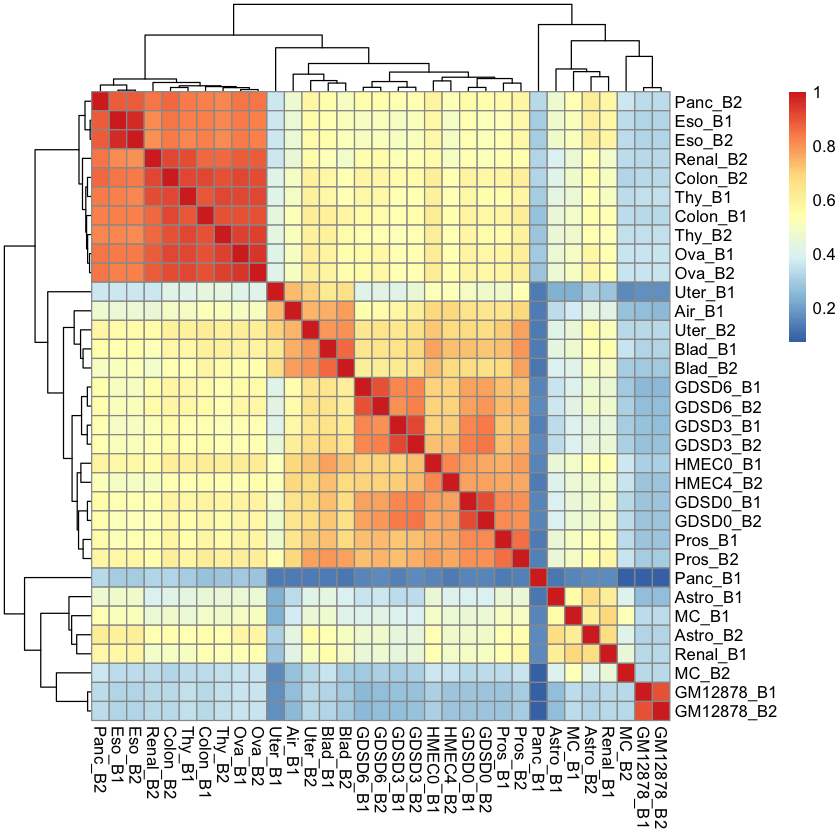

In [28]:
p = pheatmap(res)
# ggsave('p2p_pheatmap.png') # doesn't work, manual save

Saving 7 x 7 in image


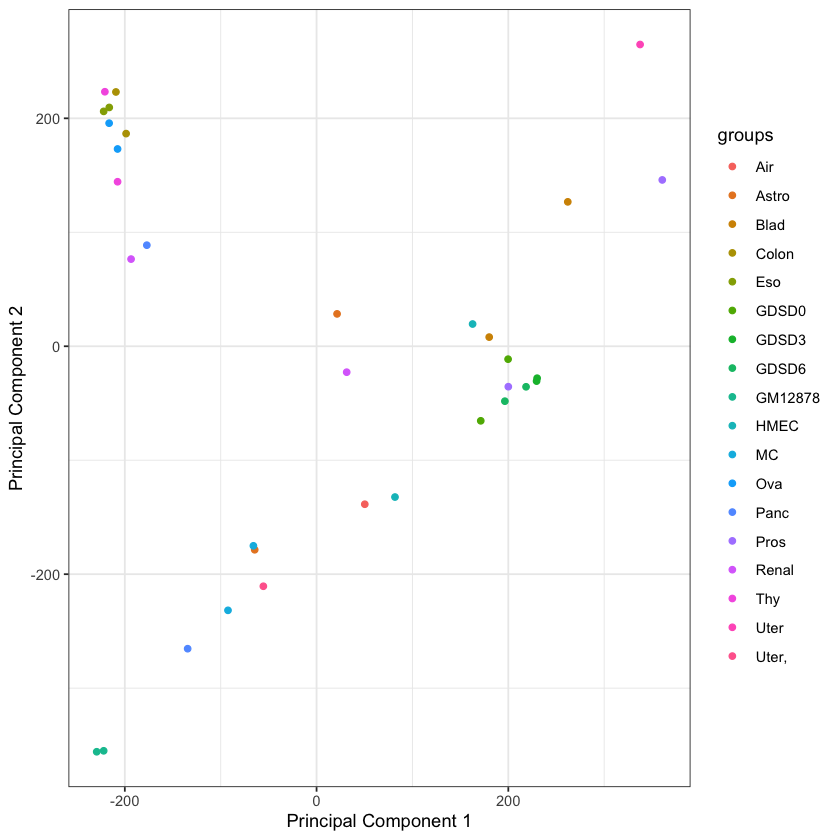

In [29]:
dlo_p2p@colData$groups = c('Air' ,'Astro' ,'Astro', 'Blad' ,'Blad' ,'Colon', 'Colon',
                           'Eso', 'Eso', 'GDSD0', 'GDSD0', 'GDSD3', 'GDSD3',
                           'GDSD6', 'GDSD6', 'GM12878', 'GM12878', 'HMEC' ,'HMEC' ,
                           'MC' ,'MC', 'Ova', 'Ova', 'Panc', 'Panc', 'Pros', 'Pros',
                           'Renal' ,'Renal', 'Thy', 'Thy', 'Uter,', 'Uter')
p = pcaPlot(dlo_p2p)
p
ggsave('p2p_pca.png')

In [30]:
dlo_p2p_df = data.frame(dlo_p2p@counts)
dlo_p2p_df$region = paste0("region_",1:nrow(dlo_p2p_df))
# head(dlo_p2p_df)
dlo_p2p_df_long = dlo_p2p_df%>%
    gather(sample, count, -region)

In [31]:
dlo_p2p_df_long_sum = dlo_p2p_df_long%>%
    mutate(tissue = str_extract(sample, "^[^\\_]+"))%>%
    group_by(tissue, region)%>%
    summarize(sum_count = sum(count))%>%
    ungroup()

In [32]:
dlo_p2p_df_sum = dlo_p2p_df_long_sum %>% spread(tissue, sum_count,fill=0)

In [33]:
rownames(dlo_p2p_df_sum) = dlo_p2p_df_sum$region

Warning message:
“Setting row names on a tibble is deprecated.”

In [34]:
dlo_p2p_df_sum = dlo_p2p_df_sum %>%
    drop_na()%>%
    mutate(HMEC = HMEC0+HMEC4)%>%
    dplyr::select(-HMEC0,-HMEC4,-region)

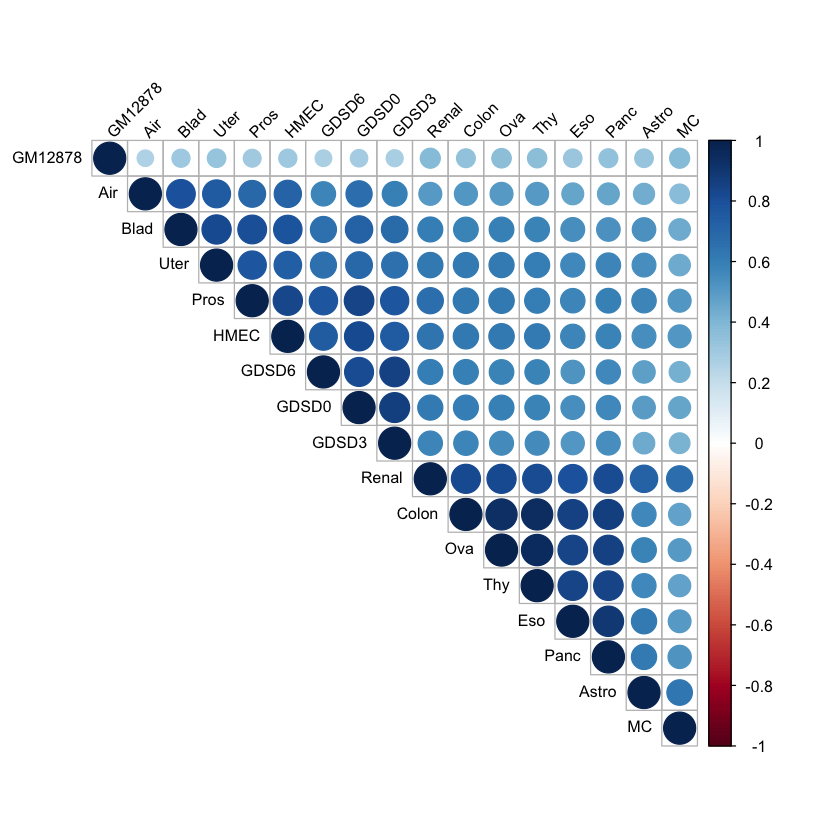

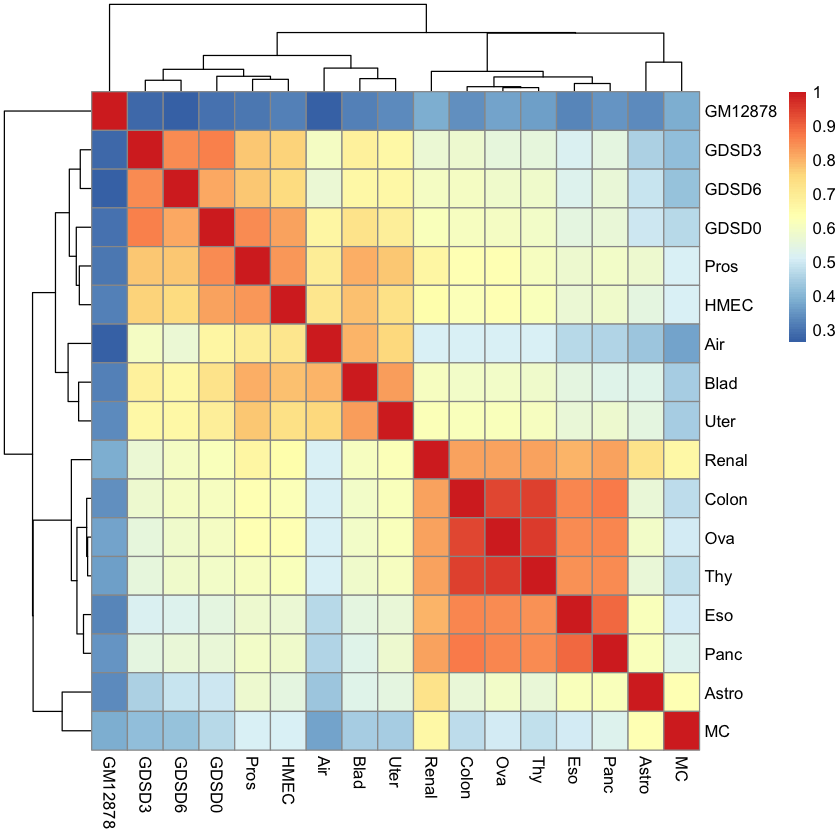

In [36]:
res_tissue = cor(dlo_p2p_df_sum,method='pearson')
# res_tissue
p1 = corrplot(res_tissue, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45,
             tl.pos='td',tl.cex=.8)

p2 = pheatmap(res_tissue)


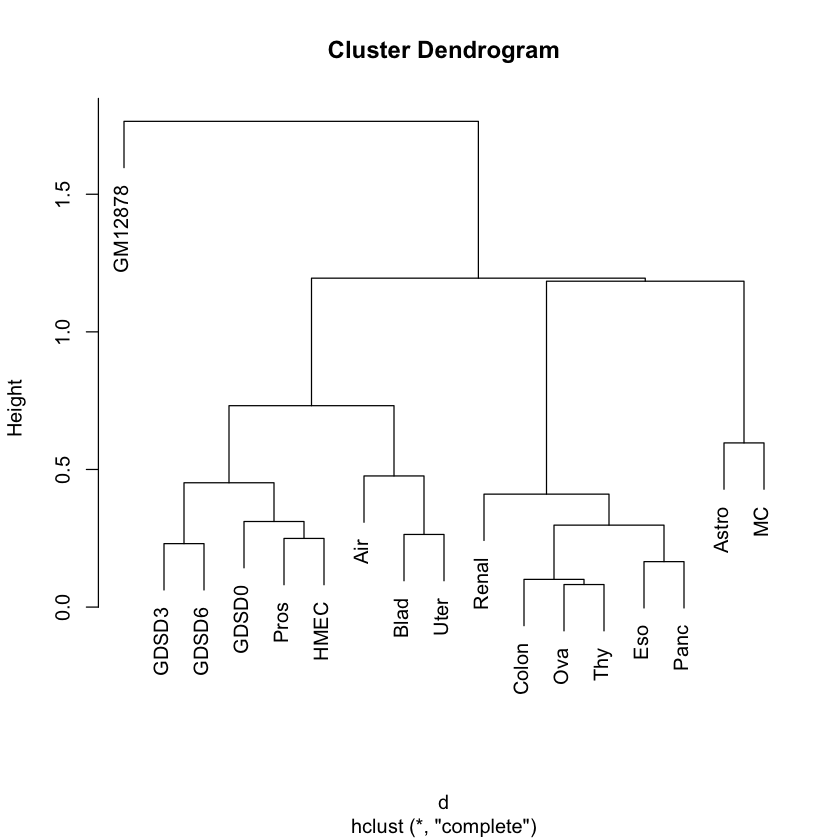

In [37]:
plot(p2$tree_row)


In [35]:
# rownames(dlo_p2p@colData)

In [168]:
# testing difference from astro
dlo_p2p@colData$groups = 'control'
dlo_p2p@colData$groups[2:3]  = 'test'
groups = dlo_p2p@colData$groups
dlo_p2p@colData

,sizeFactor,groups
,<dbl>,<chr>
Air_B1,0.43386911,control
Astro_B1,0.53480688,test
Astro_B2,1.03739601,test
Blad_B1,0.88173318,control
Blad_B2,1.44074438,control
Colon_B1,1.70707214,control
Colon_B2,3.07861236,control
Eso_B1,2.07975321,control
Eso_B2,2.39073312,control


In [169]:
 assoc <-quickAssoc(dlo_p2p)

In [170]:
# Gene based association
sw_jn <- featureTest(assoc, getHumanGenes())


In [ ]:
comp = sw_jn%>%
    arrange(PValue)
write.csv(comp, file='comp_p2p_astro.csv')

# p2p_nonmerged

In [9]:
dlo_p2p = loopsMake('fithichip_p2p_p2p1-nonmerged')

Warning message:
“Unnamed `col_types` should have the same length as `col_names`. Using smaller of the two.”Warning message:
“20432 parsing failures.
row col  expected     actual                                                    file
  1  -- 8 columns 26 columns 'fithichip_p2p_p2p1-nonmerged/Air_B1.loop_counts.bedpe'
  2  -- 8 columns 26 columns 'fithichip_p2p_p2p1-nonmerged/Air_B1.loop_counts.bedpe'
  3  -- 8 columns 26 columns 'fithichip_p2p_p2p1-nonmerged/Air_B1.loop_counts.bedpe'
  4  -- 8 columns 26 columns 'fithichip_p2p_p2p1-nonmerged/Air_B1.loop_counts.bedpe'
  5  -- 8 columns 26 columns 'fithichip_p2p_p2p1-nonmerged/Air_B1.loop_counts.bedpe'
... ... ......... .......... .......................................................
See problems(...) for more details.
”Warning message:
“Unnamed `col_types` should have the same length as `col_names`. Using smaller of the two.”Warning message:
“27187 parsing failures.
row col  expected     actual                                        

In [10]:
dim(dlo_p2p)



anchors,interactions,samples,colData,rowData
<int>,<int>,<int>,<int>,<int>
64670,135478,33,2,1


In [11]:
dlo_p2p@counts

Air_B1,Astro_B1,Astro_B2,Blad_B1,Blad_B2,Colon_B1,Colon_B2,Eso_B1,Eso_B2,GDSD0_B1,⋯,Panc_B1,Panc_B2,Pros_B1,Pros_B2,Renal_B1,Renal_B2,Thy_B1,Thy_B2,Uter_B1,Uter_B2
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,11
0,0,48,12,14,0,22,16,25,0,⋯,0,0,22,56,27,28,51,49,0,73
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,16
0,0,0,0,0,0,11,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,39
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,8,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


# data frame for tissue, edge, counts

In [53]:
dlo_p2p_df = data.frame(dlo_p2p@counts)
dlo_p2p_df$interaction= paste0("",1:nrow(dlo_p2p_df))
# head(dlo_p2p_df)
dlo_p2p_df_long = dlo_p2p_df%>%
    gather(sample, count, -interaction)

In [54]:
head(dlo_p2p_df_long)

interaction,sample,count
<chr>,<chr>,<dbl>
1,Air_B1,0
2,Air_B1,0
3,Air_B1,0
4,Air_B1,0
5,Air_B1,0
6,Air_B1,0


In [35]:
anchors_df = as.data.frame(dlo_p2p@anchors)%>%
    rownames_to_column("region")
head(anchors_df)

region,seqnames,start,end,width,strand
<chr>,<fct>,<int>,<int>,<int>,<fct>
1,1,710000,720000,10001,*
2,1,735000,745000,10001,*
3,1,755000,765000,10001,*
4,1,780000,785000,5001,*
5,1,790000,795000,5001,*
6,1,825000,830000,5001,*


In [36]:
# as.data.frame(dlo_p2p@interactions)%>%
#     mutate(left=as.character(left))%>%
#     mutate(right=as.character(right))%>%
#     head()
# head(as.data.frame(dlo_p2p@anchors))

In [66]:
interaction_df = as.data.frame(dlo_p2p@interactions)%>%
    rownames_to_column("interaction")%>%
    mutate(left=as.character(left))%>%
    mutate(right=as.character(right))%>%
    left_join(anchors_df,by=c("left"="region"))%>%
    mutate(left_name = str_c(seqnames, start,end,sep="_"))%>%
    select(interaction, left,right,left_name)%>%
    left_join(anchors_df,by=c("right"="region"))%>%
    mutate(right_name = str_c(seqnames, start,end,sep="_"))%>%
    mutate(left_anchor=left)%>%
    mutate(right_anchor=right)%>%
    select(interaction, left_anchor,right_anchor,left_name, right_name)

head(interaction_df)

interaction,left_anchor,right_anchor,left_name,right_name
<chr>,<chr>,<chr>,<chr>,<chr>
1,1,2,1_710000_720000,1_735000_745000
2,1,3,1_710000_720000,1_755000_765000
3,1,4,1_710000_720000,1_780000_785000
4,1,5,1_710000_720000,1_790000_795000
5,2,3,1_735000_745000,1_755000_765000
6,6,11,1_825000_830000,1_910000_975000


In [59]:
dim(dlo_p2p_df_long)
max(as.numeric(interaction_df$interaction))

[1] 4470774       3

[1] 135478

In [61]:
dlo_p2p_df_long_sum = dlo_p2p_df_long%>%
    mutate(tissue = str_extract(sample, "^[^\\_]+"))%>%
    group_by(tissue, interaction)%>%
    summarize(sum_count = sum(count))%>%
    ungroup()

In [63]:
dlo_p2p_df_sum = dlo_p2p_df_long_sum %>% spread(tissue, sum_count,fill=0)

In [65]:
head(dlo_p2p_df_sum)

interaction,Air,Astro,Blad,Colon,Eso,GDSD0,GDSD3,GDSD6,GM12878,HMEC0,HMEC4,MC,Ova,Panc,Pros,Renal,Thy,Uter
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,11
10,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0
100,0,0,12,10,0,100,131,45,0,27,23,0,11,27,0,13,0,0
1000,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0
10000,0,0,0,0,27,0,0,0,0,0,0,0,0,12,0,0,0,0
100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0


In [67]:
dlo_p2p_df_sum = dlo_p2p_df_sum %>%
    drop_na()%>%
    mutate(HMEC = HMEC0+HMEC4)%>%
    dplyr::select(-HMEC0,-HMEC4)%>%
    left_join(interaction_df, by='interaction')
    

In [68]:
dim(dlo_p2p_df_sum)
head(dlo_p2p_df_sum)

[1] 135478     22

interaction,Air,Astro,Blad,Colon,Eso,GDSD0,GDSD3,GDSD6,GM12878,⋯,Panc,Pros,Renal,Thy,Uter,HMEC,left_anchor,right_anchor,left_name,right_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,0,0,0,0,0,0,0,0,15,⋯,0,0,0,0,11,0,1,2,1_710000_720000,1_735000_745000
10,0,0,0,0,0,0,10,0,0,⋯,0,0,0,0,0,0,7,11,1_835000_850000,1_910000_975000
100,0,0,12,10,0,100,131,45,0,⋯,27,0,13,0,0,50,47,50,1_1880000_1900000,1_1965000_1990000
1000,0,0,0,0,20,0,0,0,0,⋯,0,0,0,0,0,0,439,443,1_21160000_21175000,1_21220000_21230000
10000,0,0,0,0,27,0,0,0,0,⋯,12,0,0,0,0,0,4713,4719,1_218610000_218615000,1_218820000_218895000
100000,0,0,0,0,0,0,0,0,0,⋯,0,0,13,0,0,0,47774,47776,13_92870000_92880000,13_93005000_93015000


In [69]:
write.csv(dlo_p2p_df_sum, 'fithichip_p2p_p2p1-nonmerged_tissue_counts.csv')

In [4]:
dlo_p2p_df_sum = read.csv( '/Users/mguo123/Google Drive/1_khavari/omics_project-LD/diffloop_data/fithichip_p2p_p2p1-nonmerged_tissue_counts.csv',stringsAsFactor=F)
head(dlo_p2p_df_sum)

,X,interaction,Air,Astro,Blad,Colon,Eso,GDSD0,GDSD3,GDSD6,⋯,Panc,Pros,Renal,Thy,Uter,HMEC,left_anchor,right_anchor,left_name,right_name
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,11,0,1,2,1_710000_720000,1_735000_745000
2,2,10,0,0,0,0,0,0,10,0,⋯,0,0,0,0,0,0,7,11,1_835000_850000,1_910000_975000
3,3,100,0,0,12,10,0,100,131,45,⋯,27,0,13,0,0,50,47,50,1_1880000_1900000,1_1965000_1990000
4,4,1000,0,0,0,0,20,0,0,0,⋯,0,0,0,0,0,0,439,443,1_21160000_21175000,1_21220000_21230000
5,5,10000,0,0,0,0,27,0,0,0,⋯,12,0,0,0,0,0,4713,4719,1_218610000_218615000,1_218820000_218895000
6,6,100000,0,0,0,0,0,0,0,0,⋯,0,0,13,0,0,0,47774,47776,13_92870000_92880000,13_93005000_93015000


In [7]:
dlo_p2p_df_sum = dlo_p2p_df_sum[,c('Air',
'Astro',
'Blad',
'Colon',
'Eso',
'GDSD6',
'GM12878',
'MC',
'Ova',
'Panc',
'Pros',
'Renal',
'Thy',
'Uter',
'HMEC')]
dim(dlo_p2p_df_sum)
                                

[1] 135478     15

In [8]:
sum(dlo_p2p_df_sum)#67715795 with GDSD0 and D3

[1] 58644651

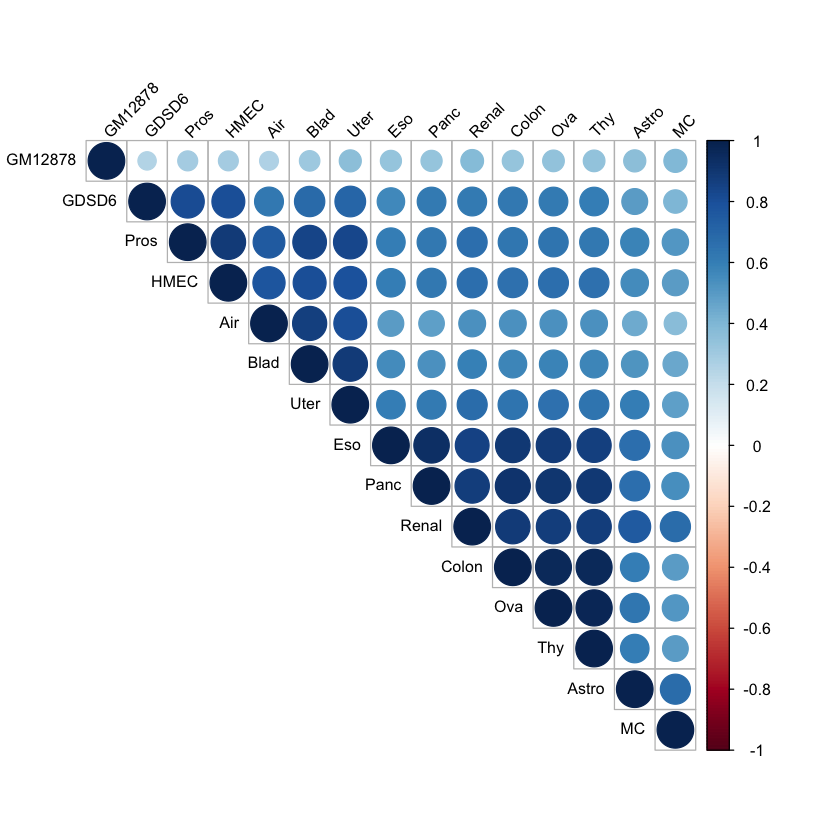

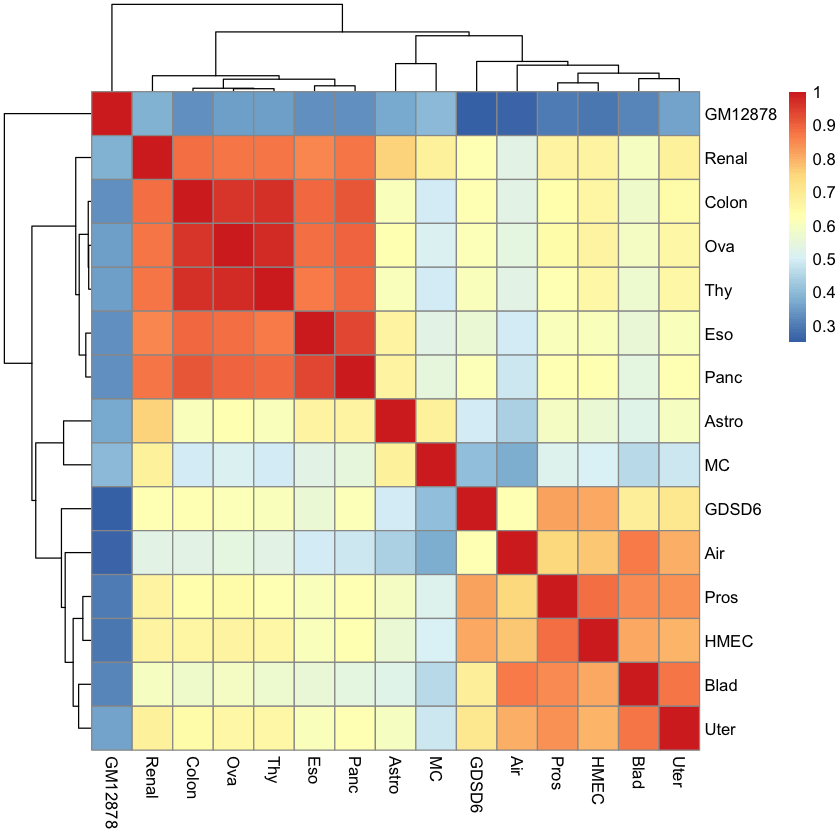

In [17]:
res_tissue = cor(dlo_p2p_df_sum,method='pearson')
# res_tissue
p1 = corrplot(res_tissue, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45,
             tl.pos='td',tl.cex=.8)

p2 = pheatmap(res_tissue)


pdf 
  2

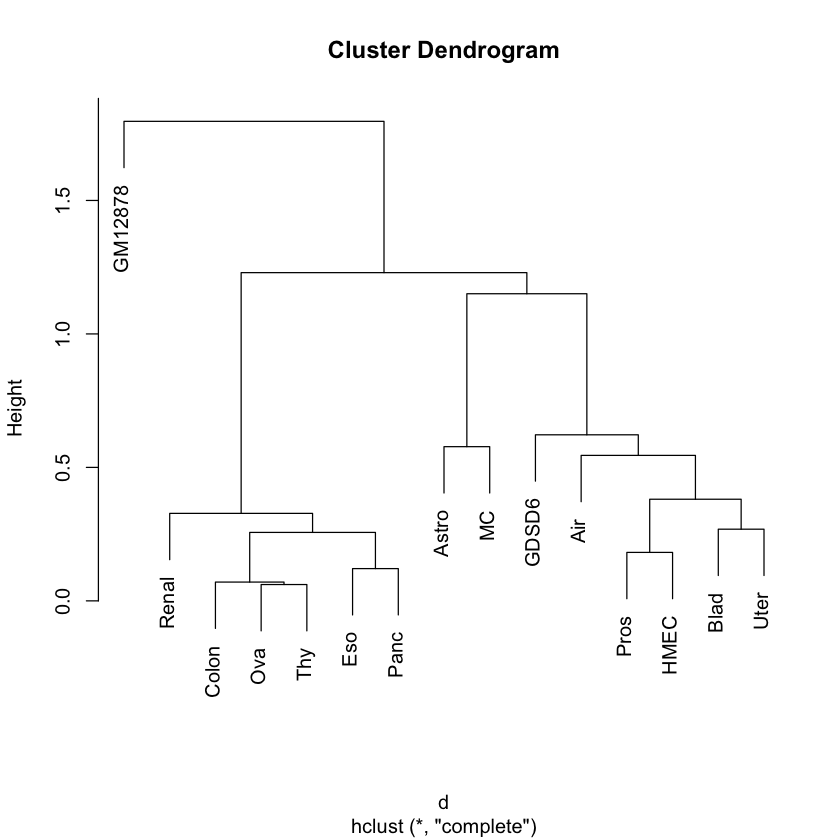

In [21]:
pdf('p2p_nonmerged_tissue_dendrogram_062521.pdf')
par(bg='white')
plot(p2$tree_row)
dev.off()
par(bg='white')
plot(p2$tree_row)

In [174]:
res = cor(dlo_p2p@counts,method='pearson')


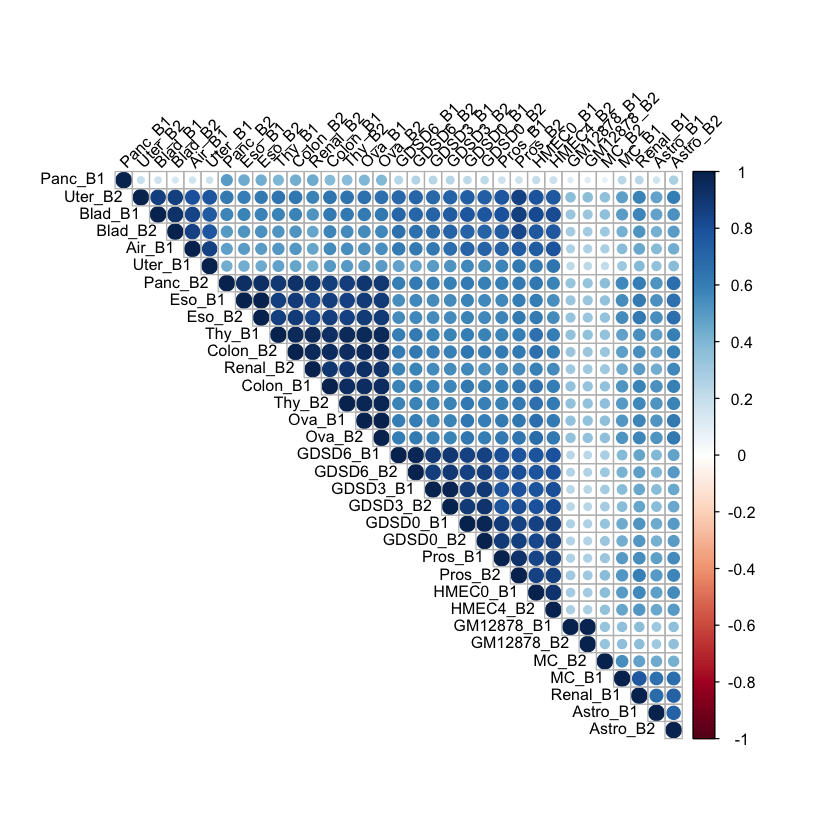

In [175]:
p = corrplot(res, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45,
             tl.pos='td',tl.cex=.8)
# p
# ggsave('p2p_corrplot.png') # manual save

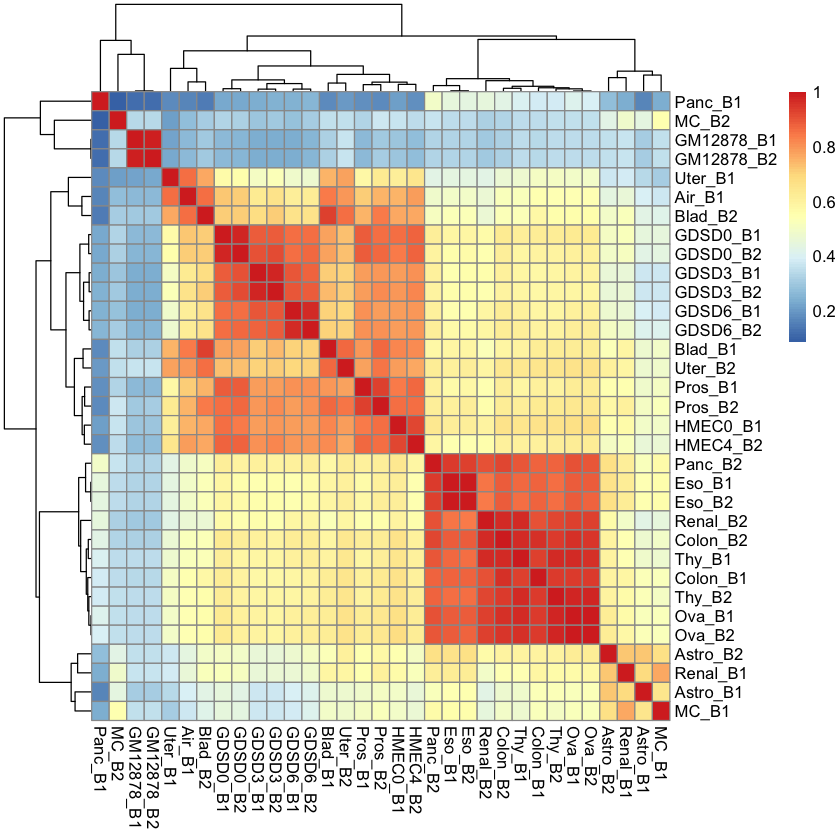

In [176]:
p = pheatmap(res)
# ggsave('p2p_pheatmap.png') # doesn't work, manual save

Saving 7 x 7 in image


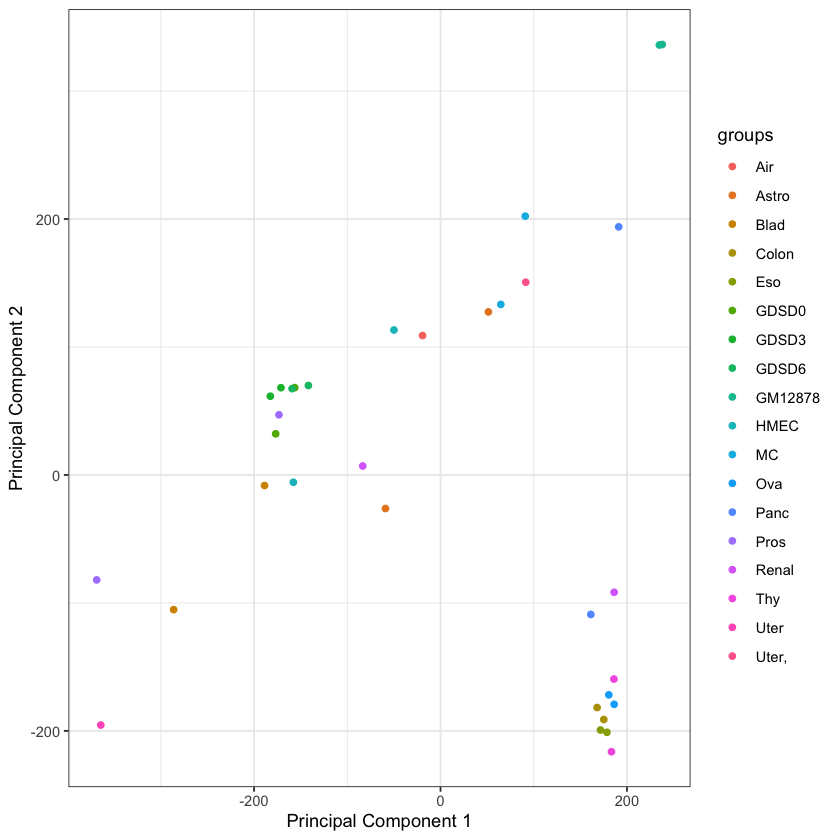

In [177]:
dlo_p2p@colData$groups = c('Air' ,'Astro' ,'Astro', 'Blad' ,'Blad' ,'Colon', 'Colon',
                           'Eso', 'Eso', 'GDSD0', 'GDSD0', 'GDSD3', 'GDSD3',
                           'GDSD6', 'GDSD6', 'GM12878', 'GM12878', 'HMEC' ,'HMEC' ,
                           'MC' ,'MC', 'Ova', 'Ova', 'Panc', 'Panc', 'Pros', 'Pros',
                           'Renal' ,'Renal', 'Thy', 'Thy', 'Uter,', 'Uter')
p = pcaPlot(dlo_p2p)
p
ggsave('p2p_nonmerged_pca.png')

In [178]:
rownames(dlo_p2p@colData)

[1] "Air_B1"     "Astro_B1"   "Astro_B2"   "Blad_B1"    "Blad_B2"   
 [6] "Colon_B1"   "Colon_B2"   "Eso_B1"     "Eso_B2"     "GDSD0_B1"  
[11] "GDSD0_B2"   "GDSD3_B1"   "GDSD3_B2"   "GDSD6_B1"   "GDSD6_B2"  
[16] "GM12878_B1" "GM12878_B2" "HMEC0_B1"   "HMEC4_B2"   "MC_B1"     
[21] "MC_B2"      "Ova_B1"     "Ova_B2"     "Panc_B1"    "Panc_B2"   
[26] "Pros_B1"    "Pros_B2"    "Renal_B1"   "Renal_B2"   "Thy_B1"    
[31] "Thy_B2"     "Uter_B1"    "Uter_B2"

In [168]:
# testing difference from astro
dlo_p2p@colData$groups = 'control'
dlo_p2p@colData$groups[2:3]  = 'test'
groups = dlo_p2p@colData$groups
dlo_p2p@colData

,sizeFactor,groups
,<dbl>,<chr>
Air_B1,0.43386911,control
Astro_B1,0.53480688,test
Astro_B2,1.03739601,test
Blad_B1,0.88173318,control
Blad_B2,1.44074438,control
Colon_B1,1.70707214,control
Colon_B2,3.07861236,control
Eso_B1,2.07975321,control
Eso_B2,2.39073312,control


In [169]:
 assoc <-quickAssoc(dlo_p2p)

In [170]:
# Gene based association
sw_jn <- featureTest(assoc, getHumanGenes())


In [ ]:
comp = sw_jn%>%
    arrange(PValue)
write.csv(comp, file='comp_p2p_astro.csv')

bed_file = '/oak/stanford/groups/khavari/users/lkhd/project/3D/HiChIP/novogene/hicpro/outputs/GDSD0_output/FitHiChIP/GDSD0_B1/5000/FitHiChIP_Peak2ALL_b5000_L20000_U2000000/P2PBckgr_1/Coverage_Bias/FitHiC_BiasCorr/Merge_Nearby_Interactions/FitHiChIP.interactions_FitHiC_Q0.01_MergeNearContacts.bed
'

# fithichip_p2a_p2p1

In [39]:
dlo_p2a = loopsMake('fithichip_p2a_p2p1')

Warning message:
“Unnamed `col_types` should have the same length as `col_names`. Using smaller of the two.”Warning message:
“11461 parsing failures.
row col  expected     actual                                          file
  1  -- 8 columns 16 columns 'fithichip_p2a_p2p1/Air_B1.loop_counts.bedpe'
  2  -- 8 columns 16 columns 'fithichip_p2a_p2p1/Air_B1.loop_counts.bedpe'
  3  -- 8 columns 16 columns 'fithichip_p2a_p2p1/Air_B1.loop_counts.bedpe'
  4  -- 8 columns 16 columns 'fithichip_p2a_p2p1/Air_B1.loop_counts.bedpe'
  5  -- 8 columns 16 columns 'fithichip_p2a_p2p1/Air_B1.loop_counts.bedpe'
... ... ......... .......... .............................................
See problems(...) for more details.
”Warning message:
“Unnamed `col_types` should have the same length as `col_names`. Using smaller of the two.”Warning message:
“16141 parsing failures.
row col  expected     actual                                            file
  1  -- 8 columns 16 columns 'fithichip_p2a_p2p1/Astro_B1.loo

In [40]:
dim(dlo_p2a)


anchors,interactions,samples,colData,rowData
<int>,<int>,<int>,<int>,<int>
76183,173556,33,2,1


In [41]:
dlo_p2a_df = data.frame(dlo_p2a@counts)
dlo_p2a_df$region = paste0("region_",1:nrow(dlo_p2a_df))
# head(dlo_p2a_df)
dlo_p2a_df_long = dlo_p2a_df%>%
    gather(sample, count, -region)

In [42]:
dlo_p2a_df_long_sum = dlo_p2a_df_long%>%
    mutate(tissue = str_extract(sample, "^[^\\_]+"))%>%
    group_by(tissue, region)%>%
    summarize(sum_count = sum(count))%>%
    ungroup()

In [43]:
dlo_p2a_df_sum = dlo_p2a_df_long_sum %>% spread(tissue, sum_count,fill=0)

In [44]:
rownames(dlo_p2a_df_sum) = dlo_p2a_df_sum$region

Warning message:
“Setting row names on a tibble is deprecated.”

In [45]:
dlo_p2a_df_sum = dlo_p2a_df_sum %>%
    drop_na()%>%
    mutate(HMEC = HMEC0+HMEC4)%>%
    dplyr::select(-HMEC0,-HMEC4,-region)

In [46]:
head(dlo_p2a_df_sum)

Air,Astro,Blad,Colon,Eso,GDSD0,GDSD3,GDSD6,GM12878,MC,Ova,Panc,Pros,Renal,Thy,Uter,HMEC
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0
0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,13,10,0,0,0,0,0,0,0,0,0,0
92,201,122,142,85,322,302,379,50,47,119,86,115,79,173,430,160
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0
0,12,0,12,0,0,0,0,10,0,0,0,13,0,10,20,0


In [47]:
sum(dlo_p2a_df_sum)

[1] 32873371

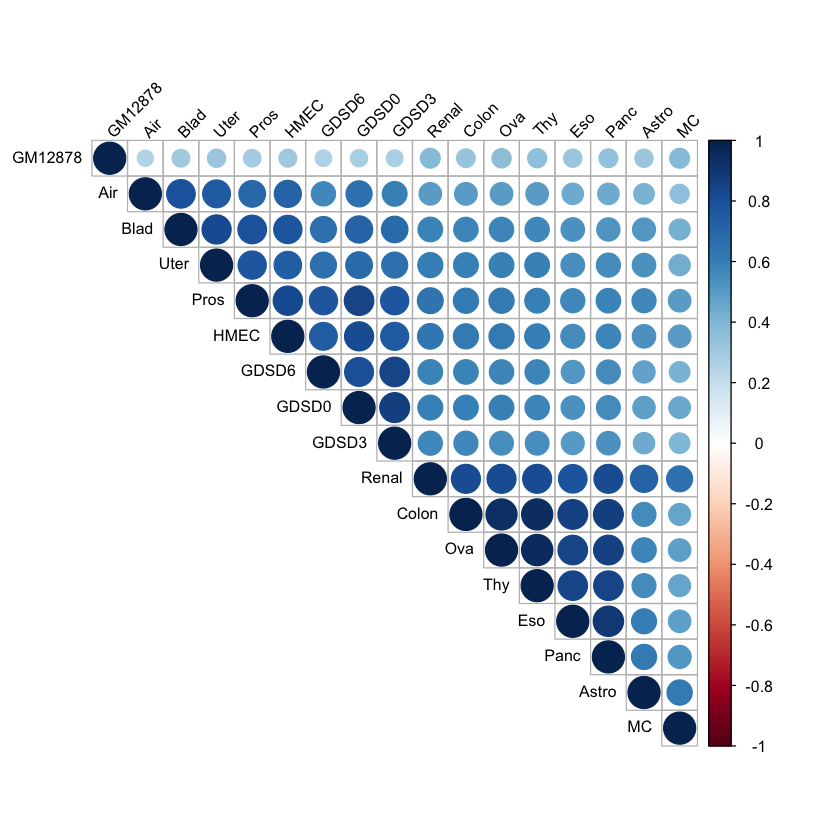

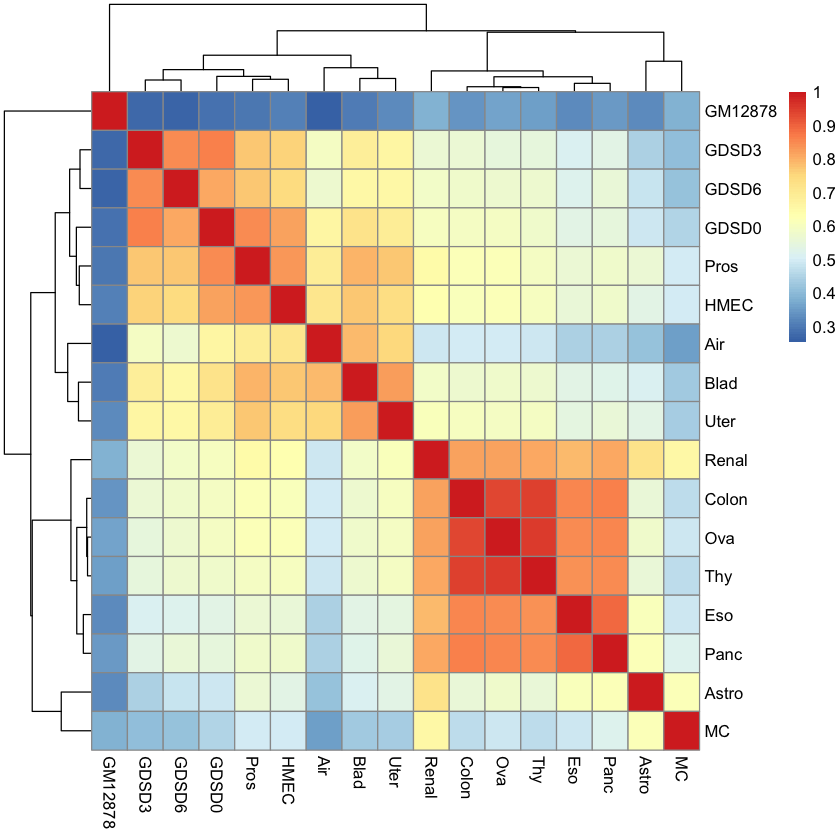

In [48]:
res_tissue = cor(dlo_p2a_df_sum,method='pearson')
# res_tissue
p1 = corrplot(res_tissue, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45,
             tl.pos='td',tl.cex=.8)

p2 = pheatmap(res_tissue)


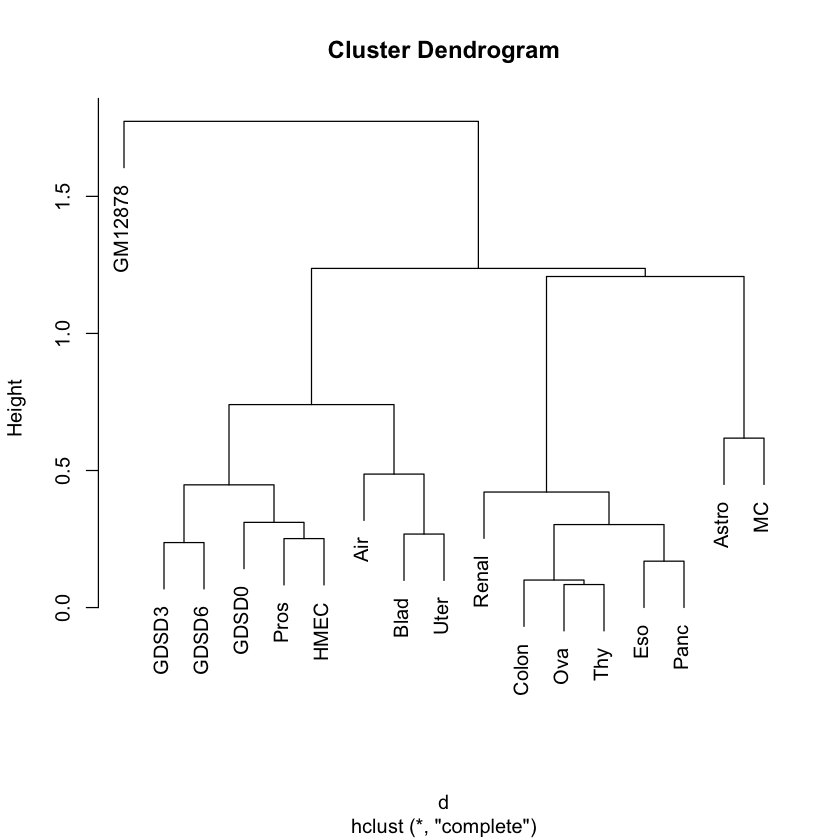

In [49]:
plot(p2$tree_row)
